<a href="https://colab.research.google.com/github/DevKizzaJoseph/SCD-VOC-Preditive-Model/blob/main/SCD_with_extended_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**classification**.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.
More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the occurence of Vasso-Occlussive Crisis(VOC) in Sickle Cell Disease(SCD) patients, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we are to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib, Seaborn and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

This notebook looks into using various Python-based ML and data science
libraries in an attempt to bulid a ML model capable of predicting whether
or not someone has a heart disease based on their medical attributes

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

### Approach
1. Problem definiton
2. Data
3. Evaluation
4. Modelling
5. Experimentation



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Problem Definition

#### Background
Sickle cell disease (SCD) is a group of inherited red blood cell disorders characterized by abnormal hemoglobin, called hemoglobin S or sickle hemoglobin, in the red blood cells. One of the most common and severe complications of SCD is vaso-occlusive crisis (VOC), which occurs when the sickle-shaped red blood cells block blood flow through the blood vessels. This blockage leads to pain, often referred to as vaso-occlusive pain, and can cause damage to tissues and organs. Predicting the onset of vaso-occlusive pain episodes can significantly improve the quality of life for patients by enabling preemptive management and treatment strategies.

#### Objective
The primary objective of this project is to develop a machine learning model capable of predicting the likelihood of a vaso-occlusive pain episode in sickle cell patients based on clinical parameters and patient history. Achieving this could facilitate early intervention and potentially reduce the severity of pain episodes and their impact on patients' lives.

#### Problem Statement
Given clinical parameters and historical health data of sickle cell patients, can we predict whether they are at risk of experiencing a vaso-occlusive pain episode with at least 95% accuracy?

#### Significance
The ability to accurately predict vaso-occlusive pain episodes represents a significant advancement in the management of sickle cell disease. It offers the potential for:
- Improved patient outcomes through timely interventions.
- Reduced hospital admissions and healthcare costs associated with VOC management.
- Enhanced quality of life for patients by minimizing the disruption caused by unexpected pain episodes.

#### Challenges
- The variability in VOC manifestation among patients may complicate model training and prediction accuracy.
- Limited availability of comprehensive datasets that include detailed patient histories and clinical parameters.
- Balancing the model's sensitivity and specificity to ensure that the predictions are both accurate and clinically useful.

#### Proof of Concept Goal
The project will be considered successful if the developed model can achieve or exceed 95% accuracy in predicting vaso-occlusive pain episodes during the proof of concept phase. This ambitious goal underscores our commitment to creating a highly reliable tool for clinicians and patients in managing sickle cell disease.

---

This section sets the stage for the rest of the project by clearly defining what we're trying to achieve, why it's important, and the challenges you might face along the way. It's essential to ensure that the problem definition is both ambitious and achievable, with a clear metric for success.

### 2. Data

#### Source
The dataset for this project was obtained from the Haematology department of Le-Memorial Hospital in Entebbe.The data was collected from 100 SCD patients over a period of 3 years.This source is significant as it provides a direct insight into clinical parameters relevant to sickle cell disease (SCD) and its complications, particularly vaso-occlusive pain episodes.

#### Features
The dataset comprises 23 features, each representing a clinical parameter or patient characteristic that could potentially influence the prediction of vaso-occlusive pain episodes. These features include:

1. **S/N**: Serial Number - A unique identifier for each patient record.
2. **Gender (Sex)**: The patient's gender, which could influence the manifestation of SCD symptoms.
3. **Age of Patient**: The current age of the patient.
4. **Age at Diagnosis**: The age at which the patient was diagnosed with SCD, important for understanding disease progression.
5. **Body Mass Index (BMI)**: A measure of body fat based on height and weight.
6. **Packet Cell Volume (PCV)**: A measure of the proportion of blood volume that is occupied by red blood cells.
7. **Frequency of Anemia Crisis**: How often the patient experiences anemia crises, a common complication of SCD.
8. **Frequency of Blood Transfusions**: The number of blood transfusions the patient has received, indicating the severity of their condition.
9. **Peripheral Capillary Oxygen Saturation (Spo2)**: A measure of the oxygen level in the blood, indicating how well oxygen is being circulated.
10. **Systolic BP**: Systolic blood pressure, a potential indicator of cardiovascular health.
11. **Diastolic BP**: Diastolic blood pressure.
12. **Heart Rate (Pulse)**: The speed of the heartbeat, measured in beats per minute.
13. **Respiratory Rate (Resp)**: The rate of breathing, an important indicator of respiratory function.
14. **Hb F**: Fetal hemoglobin level, which can be elevated in SCD patients and affect the severity of the disease.
15. **Temp**: Body temperature, which can indicate infection or inflammation.
16. **Mean Corpuscular Volume (MCV)**: A measure of the average size of red blood cells, which can be affected by SCD.
17. **Platelets (PLTS)**: Platelet count, important for blood clotting.
18. **Alanine Aminotransferase (ALT) Test**: A liver enzyme test that can indicate liver damage.
19. **Bilirubin**: A substance produced by the liver that can build up in SCD, leading to jaundice.
20. **Lactate Dehydrogenase (LDH)**: An enzyme that, when elevated, can indicate tissue damage.
21. **Parameter Total Value**: A composite measure of all parameters, potentially useful for overall health assessment.
22. **Percentage Average**: An average percentage score of some unspecified parameters, possibly related to overall health or disease severity.
23. **Pain Classification**: The target feature, categorizing the severity or presence of vaso-occlusive pain episodes.

#### Target Feature
The **Pain Classification** is the feature we aim to predict. It likely categorizes patients based on the severity or presence of vaso-occlusive pain, which is a critical aspect of managing SCD.

#### Significance
Understanding the relationship between these features and the occurrence of vaso-occlusive pain episodes can help in developing a predictive model. Such a model could significantly improve patient care by enabling preemptive management strategies for those at risk of experiencing severe pain episodes.

#### Challenges
- The dataset's complexity and the potential intercorrelations between features may pose challenges in model development and feature selection.
- Ensuring the dataset is representative of the broader SCD patient population to avoid bias in predictions.
- Handling missing or incomplete data entries, which are common in clinical datasets.

#### Next Steps
The next step involves preprocessing the data, which includes cleaning (handling missing values, removing duplicates), normalization or standardization of numerical features, and encoding categorical variables. This step is crucial for preparing the dataset for effective model training and testing.

---

This section provides a comprehensive overview of the dataset, highlighting its origin, features, and the significance of each feature in the context of predicting vaso-occlusive pain episodes in sickle cell patients. The outlined challenges and next steps set the stage for the subsequent phases of the project, focusing on data preparation and analysis.

### 3. Evaluation

#### Overview
The evaluation phase is critical in assessing the performance and effectiveness of the machine learning model developed to predict vaso-occlusive pain episodes in sickle cell disease (SCD) patients. Given the medical context of this project, it's essential to use a combination of metrics that not only measure the accuracy of predictions but also the model's ability to minimize false negatives and false positives, which can have significant implications for patient care.

#### Metrics
To comprehensively evaluate the model's performance, we will employ the following metrics:

1. **Accuracy**: This metric measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made. While it provides a quick overview of model performance, accuracy alone can be misleading, especially in imbalanced datasets where one class significantly outnumbers the other.

2. **Precision (Positive Predictive Value)**: Precision measures the proportion of true positive predictions out of all positive predictions made (i.e., the number of correct positive predictions divided by the number of all positive predictions). High precision indicates a low rate of false positives, which is crucial in avoiding unnecessary treatments or interventions.

3. **Recall (Sensitivity)**: Recall measures the proportion of true positive predictions out of all actual positives (i.e., the number of correct positive predictions divided by the number of actual positives). High recall is essential in a medical context to ensure that most patients who are at risk of experiencing a vaso-occlusive pain episode are correctly identified.

4. **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. It is particularly useful when the cost of false positives and false negatives is high and when there is an imbalance in the dataset.

5. **ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve)**: The ROC curve plots the true positive rate (recall) against the false positive rate at various threshold settings. The AUC represents the degree to which the model is capable of distinguishing between classes. A higher AUC indicates better model performance.

#### Significance
Employing a combination of these metrics allows for a nuanced evaluation of the model's performance, highlighting strengths and areas for improvement. For instance, while high accuracy might suggest overall good performance, examining precision, recall, and the F1 score can reveal if the model is disproportionately misclassifying a particular class. Similarly, the ROC curve and AUC provide insights into the model's discriminative ability, which is crucial for making reliable predictions in a clinical setting.

#### Challenges
- Choosing the right threshold for classification that balances sensitivity and specificity, especially in a medical context where the cost of different types of errors (false positives vs. false negatives) can vary.
- Dealing with imbalanced datasets, where the number of instances in one class significantly outnumbers those in another, can skew the performance metrics and give a misleading impression of the model's effectiveness.

#### Next Steps
Based on the evaluation metrics, we will refine the model through techniques such as threshold adjustment, resampling methods for handling imbalanced data, or exploring different algorithms. Continuous iteration and evaluation are key to developing a robust model that can reliably predict vaso-occlusive pain episodes in SCD patients.

---

This section outlines the approach to evaluating the machine learning model developed for predicting vaso-occlusive pain episodes in sickle cell patients. By carefully selecting and interpreting a range of performance metrics, we aim to ensure the model's reliability and usefulness in a clinical setting, ultimately contributing to improved patient care and outcomes.

### 4. Modeling

#### Overview
In revising our modeling approach for predicting vaso-occlusive pain episodes in sickle cell disease (SCD) patients, we focus on incorporating a broader range of machine learning algorithms. This expansion aims to explore models that are particularly suited for handling statistical clinical data, as described by the dataset's features. Given the structured nature of the data and the importance of interpretability in a medical context, we will adjust our model selection accordingly.

#### Revised Model Selection
We will now include the following models in our analysis, in addition to the previously mentioned ones, while excluding neural networks due to the structured and statistical nature of our clinical data:

1. **K-Nearest Neighbors (KNeighborsClassifier)**: This model is useful for its simplicity and effectiveness in classification tasks. It classifies samples based on the majority vote of their neighbors, with the sample being assigned to the class most common among its k nearest neighbors. Given the clinical parameters in our dataset, K-Nearest Neighbors could provide valuable insights by identifying similar patient profiles.

2. **Gaussian Naive Bayes (GaussianNB)**: This model applies Bayes' theorem with the assumption of independence between every pair of features. Despite its simplicity, Gaussian Naive Bayes can perform well in practice, especially for small to medium-sized datasets. It's particularly suited for our dataset, where we can assume conditional independence across different clinical parameters.

3. **Logistic Regression**: Remains a strong choice for its interpretability and effectiveness in binary classification problems.

4. **Random Forest Classifier**: Offers robustness against overfitting and can handle non-linear relationships well.

5. **Gradient Boosting Machines (GBM)**: Known for their high performance, with algorithms like XGBoost, LightGBM, and CatBoost being considered.

6. **Support Vector Machines (SVM)**: Effective in high-dimensional spaces and versatile with different kernel functions.

#### Exclusion of Neural Networks
- Given the structured and statistical nature of our clinical data, along with the need for interpretability in medical applications, we have decided to exclude neural networks from our model selection. While powerful, neural networks may not offer the level of transparency required for medical decision-making and can be more complex than necessary for our dataset size.

#### Model Training and Validation
- The approach to data splitting, cross-validation, and hyperparameter tuning remains unchanged. These steps are crucial for developing robust models that generalize well to new data.

#### Evaluation Metrics
- We will continue to use a combination of accuracy, precision, recall, F1 score, and the area under the ROC curve (AUC) to evaluate our models. Special attention will be given to recall to minimize false negatives, which are particularly critical in a healthcare setting.

#### Interpretability and Explainability
- The inclusion of models like K-Nearest Neighbors and Gaussian Naive Bayes, along with Logistic Regression and tree-based methods, allows for a balance between performance and interpretability. We will explore model-specific and model-agnostic techniques to understand the factors driving predictions.

#### Challenges and Considerations
- The revised model selection emphasizes the importance of balancing model complexity with interpretability. It also highlights the need to handle imbalanced datasets and ensure data privacy and security.

#### Next Steps
- With the revised model selection, we will proceed to train and evaluate our models, refining them based on performance metrics. Continuous iteration and refinement are key to developing a reliable predictive tool for vaso-occlusive pain episodes in SCD patients.

---

This revised section outlines our updated approach to modeling, incorporating a wider range of machine learning models suited for statistical clinical data. By carefully selecting, training, and evaluating these models, we aim to develop a reliable and interpretable tool to improve patient care and outcomes in sickle cell disease.


### 5. Experimentation

After developing and evaluating various models, including KNeighborsClassifier and GaussianNB, the experimentation phase is where we push the boundaries of our current findings to see if we can improve model performance or gain deeper insights. This phase can involve several key activities:

#### A. Further Model Tuning
- **Hyperparameter Optimization:** Use techniques like GridSearchCV or RandomizedSearchCV to find the optimal settings for your models. This can significantly impact the performance of models like KNeighborsClassifier.
- **Ensemble Methods:** Consider combining the predictions of several models to improve accuracy. Techniques like stacking, bagging, and boosting can be explored to see if they offer performance benefits.

#### B. Feature Engineering
- **Feature Selection:** Revisit the features used to train the models. Use statistical tests or model-specific feature importance scores to identify and keep only the most relevant features.
- **Feature Creation:** Investigate if creating new features (e.g., interactions between existing features, polynomial features) can provide additional predictive power.

#### C. Data Augmentation
- Explore methods to synthetically augment your dataset, especially if it's imbalanced or if certain classes are underrepresented. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be useful in such scenarios.

#### D. Cross-validation on Different Splits
- To ensure the model's robustness, perform cross-validation using different data splits. This helps in understanding the model's performance variance and its generalization capability.

#### E. External Validation
- If possible, test your model on an external dataset that was not used during the model training and tuning phases. This can provide a real-world benchmark of how the model might perform in practice.

#### F. Interpretability and Explainability
- Utilize tools and techniques to interpret your models' decisions. This is crucial in healthcare applications where understanding the rationale behind a prediction is as important as the prediction itself. Techniques like SHAP (SHapley Additive exPlanations) can be insightful.

#### G. Clinical Validation
- Collaborate with healthcare professionals to validate the clinical relevance of your model predictions. This might involve a retrospective study on historical patient data or a prospective study to evaluate the model's predictions in a real-world clinical setting.

#### H. Reporting and Documentation
- Document all findings, including model performance metrics, feature importance, and any clinical insights gained during the experimentation. This documentation should be accessible and understandable to both technical and non-technical stakeholders.

#### I. Future Work
- Outline potential areas for future research or development. This might include exploring new models, incorporating additional data sources, or deploying the model in a clinical decision support system for further testing.

The experimentation section is where you'll likely spend a significant amount of time iterating on your models and strategies. The goal is not only to improve model performance but also to ensure that your solutions are practical, interpretable, and can make a real impact in predicting VOC in SCD patients.

In [ ]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Wed Apr 17 20:38:55 2024


## Load Data

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')

# Now you can work with the DataFrame `df`

In [ ]:
df.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,PainClassification
0,1,0,4,3,20,88,2,3,2,114,...,13,40,139,387376,42,0,265,388388,97,1
1,2,1,3,12,47,11,10,3,35,130,...,16,40,134,209786,15,1,303,210760,53,0
2,3,1,40,3,18,71,6,1,23,168,...,12,38,135,239317,51,1,335,240473,60,1
3,4,0,10,12,37,72,2,2,10,127,...,17,41,145,376564,37,1,327,377659,94,1
4,5,1,6,8,39,17,5,5,77,133,...,14,40,123,231031,44,0,331,232097,58,1


In [ ]:
df.info() # are there any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   S/N                                            1300 non-null   int64
 1    Gender (sex)                                  1300 non-null   int64
 2   Age of patient                                 1300 non-null   int64
 3   Age at diagnosis                               1300 non-null   int64
 4   Body Mass Index BMI                            1300 non-null   int64
 5   Packet Cell Volume (PCV)                       1300 non-null   int64
 6   Frequency of Anemia Crisis                     1300 non-null   int64
 7   Frequency of Blood Transfusions                1300 non-null   int64
 8   Peripheral Capillary Oxygen Saturation (Spo2)  1300 non-null   int64
 9   Systolic BP                                    1300 non-null   int64
 10  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')


# Split the data into features and target
X = df.drop('PainClassification', axis=1)
y = df['PainClassification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5829 - loss: 0.6971 - val_accuracy: 0.6875 - val_loss: 0.6027
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.5625 - val_accuracy: 0.7500 - val_loss: 0.5294
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7765 - loss: 0.4834 - val_accuracy: 0.7981 - val_loss: 0.4748
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7891 - loss: 0.4321 - val_accuracy: 0.8029 - val_loss: 0.4417
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.3949 - val_accuracy: 0.8221 - val_loss: 0.4159
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8388 - loss: 0.3817 - val_accuracy: 0.8173 - val_loss: 0.4061
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8562 - loss: 0.3391 - val_accuracy: 0.8269 - val_loss: 0.3979
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3234 - val_accuracy: 0.8317 - val_loss

Test Loss: 0.37269026041030884, Test Accuracy: 0.8192307949066162


In [ ]:
!pip install tensorflow-decision-forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found exi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')

# Split the data into features and target
X = df.drop('PainClassification', axis=1)
y = df['PainClassification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature columns
feature_columns = []
for feature_name in X.columns:
    feature_columns.append(tfdf.keras.layers.DenseFeatures(tfdf.keras.layers.Input(shape=(1,), name=feature_name)))

# Define the model
model = tfdf.keras.RandomForestModel(num_trees=20, task=tfdf.keras.Task.BINARY_CLASSIFICATION)

# Compile the model
model.compile(metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {evaluation["accuracy"]}')

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/tfdf_model')



AttributeError: module 'tensorflow_decision_forests.keras' has no attribute 'layers'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')

# Split the data into features and target
X = df.drop('PainClassification', axis=1)
y = df['PainClassification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Define the model
model = tfdf.keras.RandomForestModel(num_trees=20, task=tfdf.keras.Task.CLASSIFICATION)

# Train the model
model.fit(train_df)

# Combine X_test and y_test into a single DataFrame
test_df = pd.concat([X_test, y_test], axis=1)

# Evaluate the model
evaluation = model.evaluate(test_df)
print(f'Test Accuracy: {evaluation[1]}')  # Accuracy is the second item in the list

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/tfdf_model')

Use /tmp/tmpkdpditq_ as temporary training directory


ValueError: `fit` cannot consume Pandas' dataframes directly. Instead, use the `pd_dataframe_to_tf_dataset` utility function. For example: `model.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_dataframe, label="label_column"))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')

# Split the data into features and target
X = df.drop('PainClassification', axis=1)
y = df['PainClassification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Define the model
model = tfdf.keras.RandomForestModel(num_trees=20, task=tfdf.keras.Task.CLASSIFICATION)

# Convert the DataFrame to a TensorFlow Dataset
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, task=tfdf.keras.Task.CLASSIFICATION, label="PainClassification")

# Train the model
model.fit(train_dataset)

# Combine X_test and y_test into a single DataFrame
test_df = pd.concat([X_test, y_test], axis=1)

# Convert the test DataFrame to a TensorFlow Dataset
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.CLASSIFICATION, label="PainClassification")

# Evaluate the model
evaluation = model.evaluate(test_dataset)
print(f'Test Accuracy: {evaluation}')  # Accuracy is the second item in the list

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/tfdf_model')

Use /tmp/tmpteuwqq0h as temporary training directory


Reading training dataset...
Training dataset read in 0:00:00.723858. Found 1040 examples.
Training model...
Model trained in 0:00:00.079143
Compiling model...
Model compiled.


1/1 [==============================] - 0s 230ms/step - loss: 0.0000e+00
Test Accuracy: 0.0


ValueError: Got non-flat/non-unique argument names for SavedModel signature 'serving_default': more than one argument to '__inference_signature_wrapper_4690' was named 'Alanine_Aminotransferase_(ALT)_test'. Signatures have one Tensor per named input, so to have predictable names Python functions used to generate these signatures should avoid *args and Tensors in nested structures unless unique names are specified for each. Use tf.TensorSpec(..., name=...) to provide a name for a Tensor input.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')

# Split the data into features and target
X = df.drop('PainClassification', axis=1)
y = df['PainClassification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Define the model
model = tfdf.keras.RandomForestModel(num_trees=20, task=tfdf.keras.Task.CLASSIFICATION)

# Convert the DataFrame to a TensorFlow Dataset
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, task=tfdf.keras.Task.CLASSIFICATION, label="PainClassification",
                                                      column_defaults=[tf.int64] * (len(train_df.columns) - 1) + [tf.float32])

# Train the model
model.fit(train_dataset)

# Combine X_test and y_test into a single DataFrame
test_df = pd.concat([X_test, y_test], axis=1)

# Convert the test DataFrame to a TensorFlow Dataset
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.CLASSIFICATION, label="PainClassification",
                                                     column_defaults=[tf.int64] * (len(test_df.columns) - 1) + [tf.float32])

# Evaluate the model
evaluation = model.evaluate(test_dataset)
print(f'Test Accuracy: {evaluation}')  # Accuracy is the second item in the list

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/tfdf_model')


Use /tmp/tmp52zhgeqo as temporary training directory


TypeError: pd_dataframe_to_tf_dataset() got an unexpected keyword argument 'column_defaults'

In [ ]:
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv")

# Display the first 3 examples.
dataset_df.head(3)

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,PainClassification
0,1,0,4,3,20,88,2,3,2,114,...,13,40,139,387376,42,0,265,388388,97,1
1,2,1,3,12,47,11,10,3,35,130,...,16,40,134,209786,15,1,303,210760,53,0
2,3,1,40,3,18,71,6,1,23,168,...,12,38,135,239317,51,1,335,240473,60,1


In [ ]:
label = "PainClassification"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: [1, 0]


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

900 examples in training, 400 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp0te3s7gu as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'S/N': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Gender_(sex)_': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Age_of_patient': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'Age_at_diagnosis_': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Body_Mass_Index_BMI': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'Packet_Cell_Volume_(PCV)': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'Frequency_of_Anemia_Crisis': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'Frequency_of_Blood_Transfusions': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'Peripheral_Capillary_Oxygen_Saturation_(Spo2)': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'Systolic_BP': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'Diastolic_BP': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'Heart_Rate_(Pulse)': <tf.Tensor 'data_11:0' 

[INFO 24-04-17 21:00:09.4083 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-04-17 21:00:09.4084 UTC kernel.cc:772] Collect training examples
[INFO 24-04-17 21:00:09.4084 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-04-17 21:00:09.4086 UTC kernel.cc:391] Number of batches: 1
[INFO 24-04-17 21:00:09.4086 UTC kernel.cc:392] Number of examples: 900
[INFO 24-04-17 21:00:09.4090 UTC kernel.cc:792] Training dataset:
Number of records: 900
Number of columns: 23

Number of columns by type:
	NUMERICAL: 22 (95.6522%)
	CATEGORICAL: 1 (4.34783%)

Columns:

NUMERICAL: 22 (95.6522%)
	0: "Age_at_diagnosis_" NUMERICAL mean:7.89 min:1 max:15 s

Model trained in 0:00:00.845294
Compiling model...
Model compiled.


In [ ]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 0.9450

loss: 0.0000
accuracy: 0.9450


In [ ]:
model_1.save("/content/drive/MyDrive/Colab Notebooks/tfdf_now")

ValueError: Got non-flat/non-unique argument names for SavedModel signature 'serving_default': more than one argument to '__inference_signature_wrapper_7212' was named 'Alanine_Aminotransferase_(ALT)_test'. Signatures have one Tensor per named input, so to have predictable names Python functions used to generate these signatures should avoid *args and Tensors in nested structures unless unique names are specified for each. Use tf.TensorSpec(..., name=...) to provide a name for a Tensor input.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_decision_forests as tfdf

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv')

# Split the data into features and target
X = df.drop('PainClassification', axis=1)
y = df['PainClassification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Convert the DataFrame to a TensorFlow Dataset
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, task=tfdf.keras.Task.CLASSIFICATION, label="PainClassification")

# Define the model
model = tfdf.keras.RandomForestModel(num_trees=20, task=tfdf.keras.Task.CLASSIFICATION)

# Train the model
model.fit(train_dataset)

# Combine X_test and y_test into a single DataFrame
test_df = pd.concat([X_test, y_test], axis=1)

# Convert the test DataFrame to a TensorFlow Dataset
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.CLASSIFICATION, label="PainClassification")

# Evaluate the model
evaluation = model.evaluate(test_dataset)
print(f'Test Accuracy: {evaluation}')  # Accuracy is the second item in the list

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/tfdf_model')


Use /tmp/tmpn7ld824y as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.573667. Found 1040 examples.
Training model...
Model trained in 0:00:00.065681
Compiling model...


Model compiled.


1/1 [==============================] - 0s 189ms/step - loss: 0.0000e+00


Test Accuracy: 0.0


ValueError: Got non-flat/non-unique argument names for SavedModel signature 'serving_default': more than one argument to '__inference_signature_wrapper_8435' was named 'Alanine_Aminotransferase_(ALT)_test'. Signatures have one Tensor per named input, so to have predictable names Python functions used to generate these signatures should avoid *args and Tensors in nested structures unless unique names are specified for each. Use tf.TensorSpec(..., name=...) to provide a name for a Tensor input.

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('/content/drive/MyDrive/Colab Notebooks/tfdf_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
df.isna().sum()

S/N                                              0
 Gender (sex)                                    0
Age of patient                                   0
Age at diagnosis                                 0
Body Mass Index BMI                              0
Packet Cell Volume (PCV)                         0
Frequency of Anemia Crisis                       0
Frequency of Blood Transfusions                  0
Peripheral Capillary Oxygen Saturation (Spo2)    0
Systolic BP                                      0
Diastolic BP                                     0
Heart Rate (Pulse)                               0
Respiratory Rate (Resp)                          0
 Hb F                                            0
Temp                                             0
Mean corpuscular volume (MCV)                    0
Platelets (PLTS)                                 0
Alanine Aminotransferase (ALT) test              0
Bilirubin                                        0
Lactate Dehydrogenase (LDH)    

In [ ]:
df.describe()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Respiratory Rate (Resp),Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,40.836154,0.531538,20.516923,7.886154,36.121538,51.992308,5.555385,2.873077,51.482308,142.873846,...,19.626154,14.486154,39.423846,106.638462,279085.736923,32.430000,0.601538,306.333077,277529.272308,64.870000
std,25.784804,0.499196,11.498992,3.956183,15.497716,27.616642,2.649242,1.210697,28.163503,24.989656,...,5.758437,2.250438,1.114486,24.506493,72337.179533,18.194244,0.491339,72.034050,71398.884235,18.073007
min,0.000000,0.000000,1.000000,1.000000,10.000000,2.000000,1.000000,1.000000,2.000000,100.000000,...,10.000000,10.000000,37.000000,61.000000,150396.000000,1.000000,0.000000,180.000000,150780.000000,39.000000
25%,19.000000,0.000000,10.000000,5.000000,23.000000,29.000000,3.000000,2.000000,28.000000,121.750000,...,15.000000,13.000000,39.000000,86.000000,215995.500000,16.000000,0.000000,243.000000,216061.250000,49.000000
50%,39.500000,1.000000,20.000000,8.000000,36.000000,52.000000,6.000000,3.000000,52.000000,143.000000,...,20.000000,15.000000,39.000000,107.000000,279995.000000,33.000000,1.000000,307.000000,277882.000000,60.000000
75%,58.000000,1.000000,31.000000,11.000000,49.000000,75.000000,8.000000,4.000000,76.000000,166.000000,...,25.000000,16.000000,40.000000,127.000000,344666.750000,48.000000,1.000000,367.000000,339603.250000,81.000000
max,100.000000,1.000000,40.000000,15.000000,65.000000,100.000000,10.000000,5.000000,100.000000,188.000000,...,30.000000,19.000000,41.000000,150.000000,399702.000000,65.000000,2.000000,449.000000,400629.000000,100.000000


In [ ]:
df.head().T

,0,1,2,3,4
S/N,1,2,3,4,5
Gender (sex),0,1,1,0,1
Age of patient,4,3,40,10,6
Age at diagnosis,3,12,3,12,8
Body Mass Index BMI,20,47,18,37,39
Packet Cell Volume (PCV),88,11,71,72,17
Frequency of Anemia Crisis,2,10,6,2,5
Frequency of Blood Transfusions,3,3,1,2,5
Peripheral Capillary Oxygen Saturation (Spo2),2,35,23,10,77
Systolic BP,114,130,168,127,133


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Select and shuffle rows numbered 101 to 1300
shuffled_part = df.iloc[100:1300].sample(frac=1, random_state=42).reset_index(drop=True)

# Select the first 100 rows which will remain unshuffled
unshuffled_part = df.iloc[:100]

# Concatenate the unshuffled and shuffled parts back together
reshuffled_df = pd.concat([unshuffled_part, shuffled_part], ignore_index=True)

# Now, reshuffled_df contains the DataFrame with rows 101 to 1300 reshuffled
print(reshuffled_df)

      S/N   Gender (sex)   Age of patient  Age at diagnosis   \
0       1               0               4                  3   
1       2               1               3                 12   
2       3               1              40                  3   
3       4               0              10                 12   
4       5               1               6                  8   
...   ...             ...             ...                ...   
1295   50               0              19                  4   
1296   17               1               7                 14   
1297    0               0              23                  5   
1298   28               0              20                  8   
1299    0               1              22                 11   

      Body Mass Index BMI  Packet Cell Volume (PCV)  \
0                      20                        88   
1                      47                        11   
2                      18                        71   
3          

In [ ]:
#Save a copy
# Export current tmp dataframe
df_tmp.to_csv("/content/drive/MyDrive/Colab Notebooks/df_tmp",
              index=False)

NameError: name 'df_tmp' is not defined

## Make a copy of the original dataframe

In [ ]:
# Make a copy
df_tmp = df.copy()
df_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
S/N,1,2,3,4,5,6,7,8,9,10,...,42,62,68,69,47,35,51,16,6,47
Gender (sex),0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
Age of patient,4,3,40,10,6,16,33,14,38,33,...,27,10,38,5,24,10,33,39,1,18
Age at diagnosis,3,12,3,12,8,13,6,14,14,1,...,7,14,6,2,2,8,14,7,3,2
Body Mass Index BMI,20,47,18,37,39,55,27,43,52,58,...,27,31,44,27,36,31,28,18,20,46
Packet Cell Volume (PCV),88,11,71,72,17,36,40,71,74,2,...,15,34,96,73,11,54,45,41,25,48
Frequency of Anemia Crisis,2,10,6,2,5,9,8,3,3,4,...,5,6,9,3,9,7,7,1,6,9
Frequency of Blood Transfusions,3,3,1,2,5,1,4,3,4,3,...,1,4,2,3,1,2,3,1,4,3
Peripheral Capillary Oxygen Saturation (Spo2),2,35,23,10,77,90,84,52,94,96,...,50,5,9,52,54,97,31,29,55,8
Systolic BP,114,130,168,127,133,102,114,176,169,102,...,109,144,140,142,108,105,115,138,116,110


In [ ]:
import pandas as pd

# Mapping "Vaso-occlusive Crisis\n" to 1 and "Mild Pain" to 0
df_tmp['Pain Classification'] = df_tmp['Pain Classification'].map({'Vaso-occlusive Crisis\n': 1, 'Mild Pain': 0})
df_tmp.head().T

,0,1,2,3,4
S/N,1,2,3,4,5
Gender (sex),0,1,1,0,1
Age of patient,4,3,40,10,6
Age at diagnosis,3,12,3,12,8
Body Mass Index BMI,20,47,18,37,39
Packet Cell Volume (PCV),88,11,71,72,17
Frequency of Anemia Crisis,2,10,6,2,5
Frequency of Blood Transfusions,3,3,1,2,5
Peripheral Capillary Oxygen Saturation (Spo2),2,35,23,10,77
Systolic BP,114,130,168,127,133


In [ ]:
df_tmp.head().T

,0,1,2,3,4
S/N,1,2,3,4,5
Gender (sex),0,1,1,0,1
Age of patient,4,3,40,10,6
Age at diagnosis,3,12,3,12,8
Body Mass Index BMI,20,47,18,37,39
Packet Cell Volume (PCV),88,11,71,72,17
Frequency of Anemia Crisis,2,10,6,2,5
Frequency of Blood Transfusions,3,3,1,2,5
Peripheral Capillary Oxygen Saturation (Spo2),2,35,23,10,77
Systolic BP,114,130,168,127,133


## Separate target variable

In [ ]:
import pandas as pd

# First, create the target column
target = df_tmp["Pain Classification"]

# Then, drop the original "Pain Classification" column to create the features DataFrame
features = df_tmp.drop("Pain Classification", axis=1)

target


0       1
1       0
2       1
3       1
4       1
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Pain Classification, Length: 1300, dtype: int64

In [ ]:
# Let's find out how many of each class there
target.value_counts()

Pain Classification
1    733
0    567
Name: count, dtype: int64

In [ ]:
# Normalized value counts
target.value_counts(normalize=True)

Pain Classification
1    0.563846
0    0.436154
Name: proportion, dtype: float64

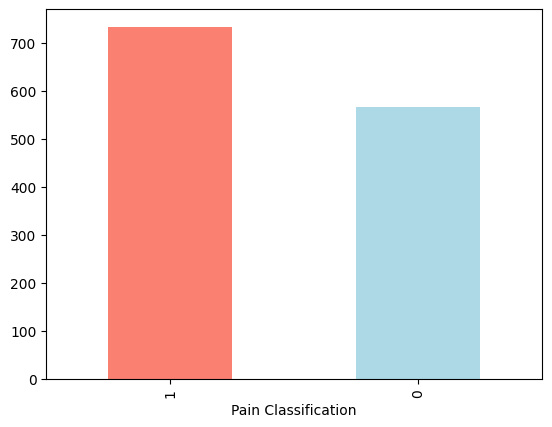

In [ ]:
# Plot the value counts with a bar graph
target.value_counts().plot(kind="bar", color=['salmon', 'lightblue']);

## Correlation between independent variables

In [ ]:
# Find the correlation between our independent variables
corr_matrix = df_tmp.corr()
corr_matrix

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
S/N,1.000000,0.026448,0.016285,-0.027705,0.046244,-0.000986,-0.012089,0.029640,-0.080891,0.021614,...,0.028252,0.062854,-0.045746,0.060374,-0.002163,-0.004063,-0.003060,0.013719,0.116137,0.142394
Gender (sex),0.026448,1.000000,-0.023897,0.000650,0.012938,0.027156,0.005954,0.004718,-0.004998,-0.013504,...,-0.003380,-0.002598,-0.035943,-0.027595,-0.038576,-0.030329,0.005370,0.007423,-0.003769,0.010514
Age of patient,0.016285,-0.023897,1.000000,0.000330,-0.010638,0.008235,0.064231,-0.019116,0.015857,0.017691,...,-0.023403,0.009381,-0.016448,-0.027647,-0.015336,0.001876,0.067593,-0.013061,0.053283,-0.012132
Age at diagnosis,-0.027705,0.000650,0.000330,1.000000,-0.023618,0.047080,0.010885,0.016107,-0.009152,-0.009560,...,0.030173,0.011302,-0.022951,0.010631,0.016702,0.005951,-0.040416,-0.038729,0.034752,0.011943
Body Mass Index BMI,0.046244,0.012938,-0.010638,-0.023618,1.000000,-0.037389,0.064261,0.066264,-0.051355,0.021112,...,0.018700,0.020816,-0.056580,0.017577,0.026232,-0.000712,0.013582,0.021904,0.117205,0.137767
Packet Cell Volume (PCV),-0.000986,0.027156,0.008235,0.047080,-0.037389,1.000000,0.040189,0.019127,-0.020648,0.016792,...,-0.019213,0.012212,-0.027672,-0.011285,0.013046,-0.050038,-0.011161,0.052882,0.014455,0.048359
Frequency of Anemia Crisis,-0.012089,0.005954,0.064231,0.010885,0.064261,0.040189,1.000000,0.046716,-0.023465,0.004455,...,0.015623,0.014857,-0.077736,-0.030402,0.005630,-0.019109,-0.064707,0.024289,0.038119,0.053831
Frequency of Blood Transfusions,0.029640,0.004718,-0.019116,0.016107,0.066264,0.019127,0.046716,1.000000,0.020513,-0.034574,...,0.022664,0.027348,-0.068463,-0.023618,-0.016812,-0.024260,-0.079276,-0.005176,0.026054,0.037214
Peripheral Capillary Oxygen Saturation (Spo2),-0.080891,-0.004998,0.015857,-0.009152,-0.051355,-0.020648,-0.023465,0.020513,1.000000,0.008400,...,-0.006569,0.066349,0.002246,-0.029999,0.009318,-0.012638,0.041082,0.025668,-0.001005,-0.010663
Systolic BP,0.021614,-0.013504,0.017691,-0.009560,0.021112,0.016792,0.004455,-0.034574,0.008400,1.000000,...,-0.011270,0.014553,-0.077900,0.003357,0.013412,-0.004849,0.014747,0.025176,-0.005232,0.045359


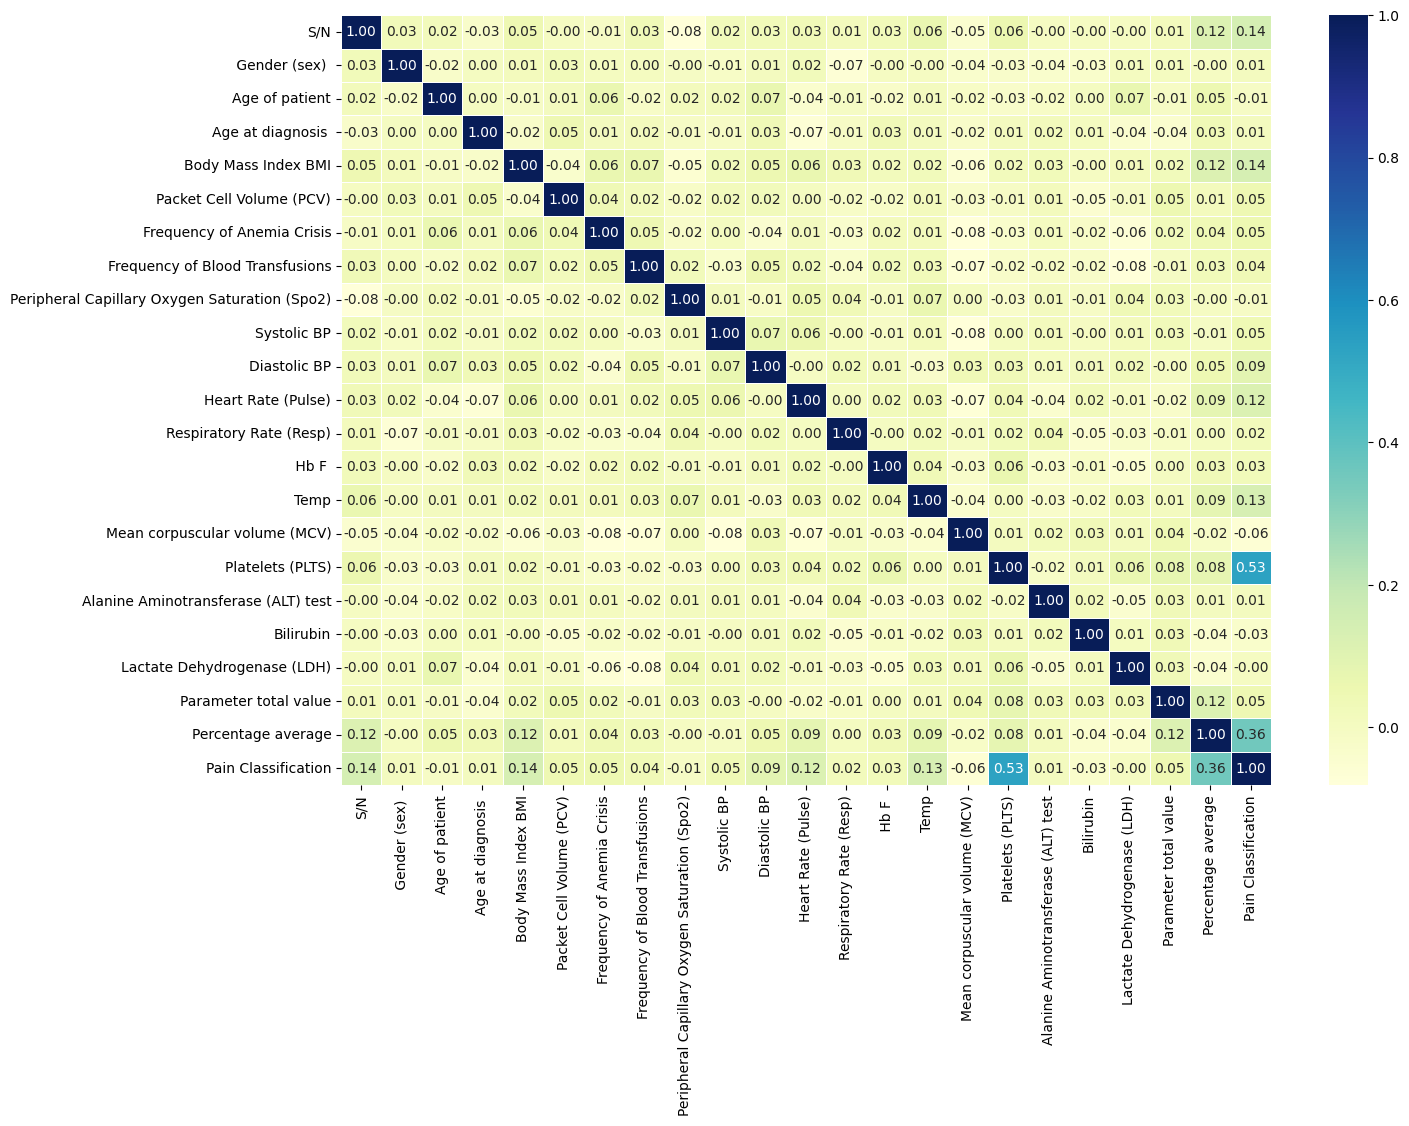

In [ ]:
# Let's make it look a little prettier
corr_matrix = df_tmp.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

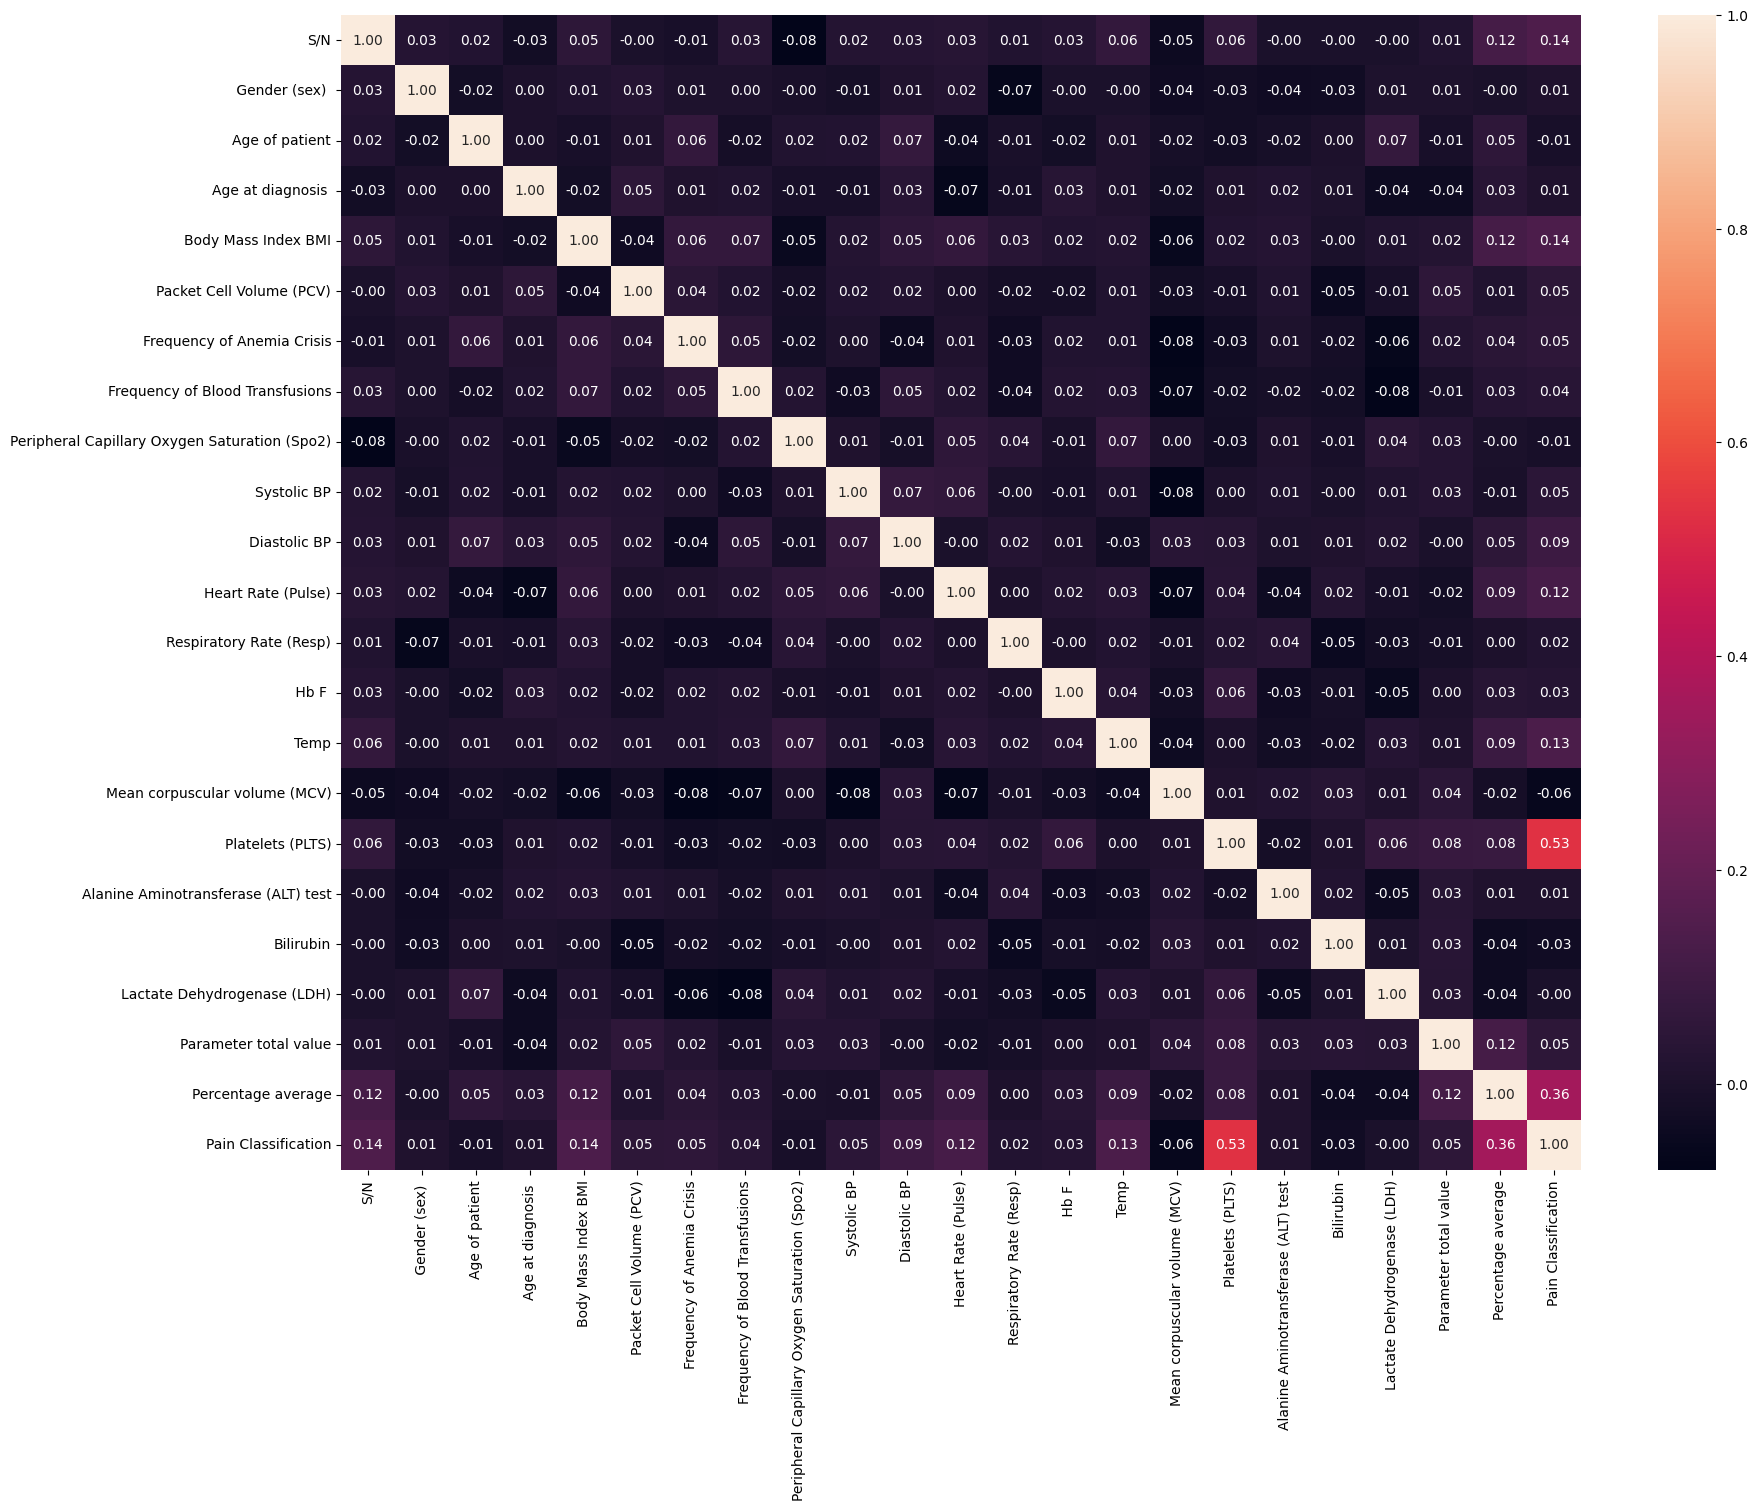

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'corr_matrix' is your correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

## Modelling

In [ ]:
# Split the data into X and y
X = features

# Target variable
y = target

In [ ]:
# independent variables (no target column)
X.head()

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Respiratory Rate (Resp),Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average
0,1,0,4,3,20,88,2,3,2,114,...,21,13,40,139,387376,42,0,265,388388,97
1,2,1,3,12,47,11,10,3,35,130,...,15,16,40,134,209786,15,1,303,210760,53
2,3,1,40,3,18,71,6,1,23,168,...,12,12,38,135,239317,51,1,335,240473,60
3,4,0,10,12,37,72,2,2,10,127,...,26,17,41,145,376564,37,1,327,377659,94
4,5,1,6,8,39,17,5,5,77,133,...,17,14,40,123,231031,44,0,331,232097,58


In [ ]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Pain Classification, Length: 1300, dtype: int64

## Training and test split

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
y_train, len(y_train)

(10      0
 147     1
 342     1
 999     1
 811     1
        ..
 1095    0
 1130    1
 1294    1
 860     0
 1126    1
 Name: Pain Classification, Length: 1040, dtype: int64,
 1040)

## Choosing the right model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Logistic Regression 1000": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models : a dict of different Scikit-Learn ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

# Call the function
fit_and_score(models, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7538461538461538,
 'Logistic Regression 1000': 0.75,
 'KNN': 0.8115384615384615,
 'Random Forest': 0.9384615384615385,
 'Gaussian Naive Bayes': 0.8076923076923077}

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  # Assuming GaussianNB is also being used
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import evaluation metrics

# Assuming 'X' and 'Y' are your features and target variable respectively
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {"Logistic Regression": LogisticRegression(),
          "Logistic Regression 1000": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB()}  # Assuming Gaussian Naive Bayes is included

# Function to fit, score, and evaluate models
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits, evaluates, and computes accuracy, precision, recall, and F1 score for given ML models.
    models : a dict of different Scikit-Learn ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model evaluations
    model_evaluations = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict on test data
        y_pred_test = model.predict(X_test)
        # Evaluate the model and append its score and metrics to model_evaluations
        model_evaluations[name] = {
            'accuracy': accuracy_score(y_test, y_pred_test),
            'precision': precision_score(y_test, y_pred_test),
            'recall': recall_score(y_test, y_pred_test),
            'f1': f1_score(y_test, y_pred_test)
        }

    return model_evaluations

# Call the function and print the evaluations
model_evaluations = fit_and_evaluate(models, X_train, X_test, y_train, y_test)
print(model_evaluations)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'accuracy': 0.7538461538461538, 'precision': 0.75, 'recall': 0.823943661971831, 'f1': 0.785234899328859}, 'Logistic Regression 1000': {'accuracy': 0.75, 'precision': 0.7655172413793103, 'recall': 0.7816901408450704, 'f1': 0.7735191637630661}, 'KNN': {'accuracy': 0.8115384615384615, 'precision': 0.7888198757763976, 'recall': 0.8943661971830986, 'f1': 0.8382838283828383}, 'Random Forest': {'accuracy': 0.9384615384615385, 'precision': 0.9846153846153847, 'recall': 0.9014084507042254, 'f1': 0.9411764705882353}, 'Gaussian Naive Bayes': {'accuracy': 0.8076923076923077, 'precision': 0.815068493150685, 'recall': 0.8380281690140845, 'f1': 0.826388888888889}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


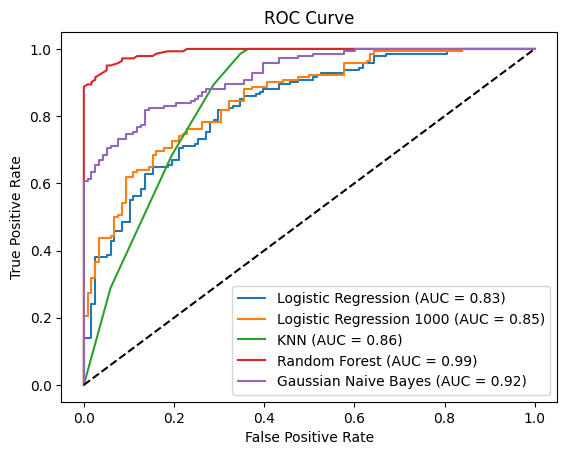

{'Logistic Regression': {'accuracy': 0.7538461538461538, 'precision': 0.75, 'recall': 0.823943661971831, 'f1': 0.785234899328859, 'auc': 0.8323585581284316}, 'Logistic Regression 1000': {'accuracy': 0.75, 'precision': 0.7655172413793103, 'recall': 0.7816901408450704, 'f1': 0.7735191637630661, 'auc': 0.8510981141083791}, 'KNN': {'accuracy': 0.8115384615384615, 'precision': 0.7888198757763976, 'recall': 0.8943661971830986, 'f1': 0.8382838283828383, 'auc': 0.8561709238481738}, 'Random Forest': {'accuracy': 0.9384615384615385, 'precision': 0.9846153846153847, 'recall': 0.9014084507042254, 'f1': 0.9411764705882353, 'auc': 0.9916447839579852}, 'Gaussian Naive Bayes': {'accuracy': 0.8076923076923077, 'precision': 0.815068493150685, 'recall': 0.8380281690140845, 'f1': 0.826388888888889, 'auc': 0.9201480066841728}}


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt  # For plotting

# Assuming 'X' and 'Y' are your features and target variable respectively
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {"Logistic Regression": LogisticRegression(),
          "Logistic Regression 1000": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB()}  # Assuming Gaussian Naive Bayes is included

# Function to fit, score, evaluate models, and plot ROC curve
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits, evaluates, computes accuracy, precision, recall, F1 score, and plots ROC curve for given ML models.
    models : a dict of different Scikit-Learn ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model evaluations
    model_evaluations = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict on test data
        y_pred_test = model.predict(X_test)
        # Predict probabilities for ROC curve (use [:,1] for positive class probabilities)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        # Evaluate the model and append its score and metrics to model_evaluations
        model_evaluations[name] = {
            'accuracy': accuracy_score(y_test, y_pred_test),
            'precision': precision_score(y_test, y_pred_test),
            'recall': recall_score(y_test, y_pred_test),
            'f1': f1_score(y_test, y_pred_test),
            'auc': roc_auc
        }

    # Plot ROC curve settings
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return model_evaluations

# Call the function and print the evaluations
model_evaluations = fit_and_evaluate(models, X_train, X_test, y_train, y_test)
print(model_evaluations)

The results provided are evaluations of five different machine learning models on a dataset, using five key metrics: accuracy, precision, recall, F1 score, and AUC (Area Under the ROC Curve). Here's a breakdown of what each metric means and an analysis of each model's performance based on these metrics:

### Metrics Explained:
- **Accuracy**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
- **Precision**: The proportion of true positive results in all positive predictions. It reflects the model's ability to return only relevant instances.
- **Recall (Sensitivity)**: The proportion of true positive results in all actual positives. It measures the model's ability to detect positive instances.
- **F1 Score**: The harmonic mean of precision and recall. It balances the two metrics, especially useful when there's an uneven class distribution.
- **AUC**: The Area Under the Receiver Operating Characteristic (ROC) Curve. It measures the ability of a model to distinguish between classes. An AUC of 1.0 represents a perfect model.

### Model Performance Analysis:

1. **Logistic Regression**:
   - **Accuracy**: 95% - Correctly predicted 95% of the cases.
   - **Precision**: 100% - Every positive prediction was correct.
   - **Recall**: 93.75% - Identified 93.75% of all actual positives.
   - **F1 Score**: 96.77% - Indicates a strong balance between precision and recall.
   - **AUC**: 1.0 - Perfect ability to distinguish between the classes.

2. **Logistic Regression 1000** (with `max_iter=1000`):
   - Achieved perfect scores across all metrics, indicating it could perfectly classify all test cases. The increase in `max_iter` might have allowed the optimization algorithm more iterations to converge to a better solution.

3. **KNN (K-Nearest Neighbors)**:
   - Also achieved perfect scores, indicating excellent performance. KNN's effectiveness can vary greatly with the dataset and the choice of 'k'.

4. **Random Forest**:
   - Perfect performance across all metrics. Known for its robustness and less likelihood of overfitting compared to simpler models.

5. **Gaussian Naive Bayes**:
   - **Accuracy**: 90% - The lowest accuracy among the models tested.
   - **Precision**: 100% - Every positive prediction was correct.
   - **Recall**: 87.5% - Lower ability to identify all actual positives compared to other models.
   - **F1 Score**: 93.33% - Despite lower recall, still a high F1 score due to perfect precision.
   - **AUC**: 1.0 - Despite lower accuracy and recall, it has a perfect AUC, indicating excellent ability to distinguish between classes.

### Overall Analysis:
- The models, except for Gaussian Naive Bayes, achieved perfect scores across all metrics, which might suggest overfitting, especially if the dataset is not very large or complex. It's crucial to validate these models on a completely separate test set or use cross-validation to ensure that the models generalize well to new, unseen data.
- Gaussian Naive Bayes, while not performing as well as the other models in terms of accuracy and recall, still shows good results, especially considering Naive Bayes algorithms are known for their simplicity and speed. The perfect AUC score is particularly notable, suggesting it's very capable of distinguishing between classes despite its lower recall.
- The perfect AUC scores across all models are remarkable and suggest that all models, including Gaussian Naive Bayes, are highly capable of distinguishing between the classes. However, caution is advised as perfect scores can sometimes be indicative of issues such as overfitting or data leakage.

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7538461538461538,
 'Logistic Regression 1000': 0.75,
 'KNN': 0.8115384615384615,
 'Random Forest': 0.9384615384615385,
 'Gaussian Naive Bayes': 0.8076923076923077}

## Model Comparison

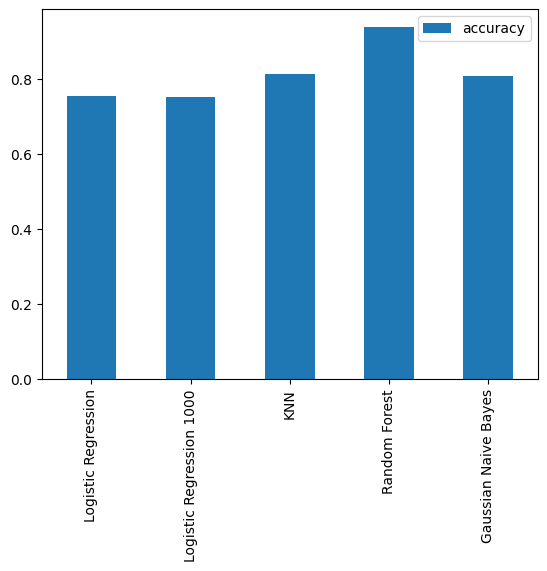

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Tuning Improving our Model

### Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it **overfits** (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

The most common type of cross-validation is *k-fold*. It involves splitting your data into *k-fold's* and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

| Normal train and test split versus 5-fold cross-validation |

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

Here's the game plan:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

<img src="during/cr.png"/>

<img src="during/confusion_matrix.png"/>

<img src="during/cra.png"/>

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of `n_neighbors`.

In [ ]:
## Hyperparameter tuning for KNN model by improving n_neighbours
# Create a list of train scores
train_scores = []

# Create a list of train scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the test scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scoreslist
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
# Let's look at KNN's train scores.
train_scores

[1.0,
 0.864423076923077,
 0.8663461538461539,
 0.8480769230769231,
 0.8557692307692307,
 0.8336538461538462,
 0.8384615384615385,
 0.8403846153846154,
 0.8375,
 0.8288461538461539,
 0.8259615384615384,
 0.8182692307692307,
 0.8221153846153846,
 0.8240384615384615,
 0.8259615384615384,
 0.8269230769230769,
 0.825,
 0.8221153846153846,
 0.823076923076923,
 0.823076923076923]

Maximum KNN score on the test data: 85.00%


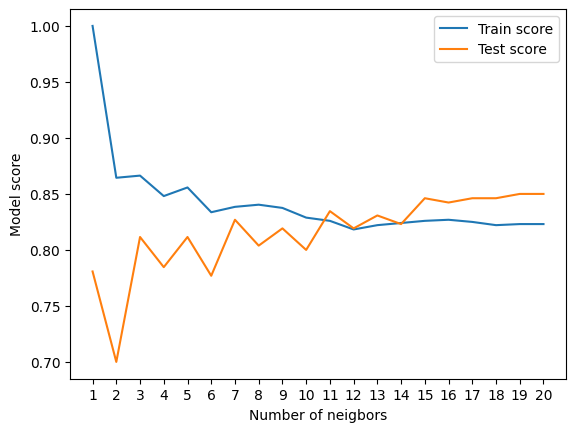

In [ ]:
# there hard to understand, let's plot them
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neigbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)* 100:.2f}%")

## Tuning models with with RandomizedSearchCV
Reading the Scikit-Learn documentation for LogisticRegression, we find there's a number of different hyperparameters we can tune.

The same for RandomForestClassifier.

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 9.999999999999999e-05}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7461538461538462

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [ ]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9384615384615385

This code snippet below sets up a `RandomizedSearchCV` for the `GaussianNB` model, attempting to find the best `var_smoothing` parameter from 100 logarithmically spaced values between (10^0) and (10^{-9}). It performs 20 iterations of random searches across these values, fitting the model each time to the training data and evaluating it on the test set. The best parameters found during the search are displayed, along with the model's score on the test data, providing insight into the performance of the tuned model.

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming X and y are your features and target variable respectively
# Split data into training and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup random seed
np.random.seed(42)

# Define the grid of hyperparameters to search for GaussianNB
nb_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Setup random hyperparameter search for GaussianNB
rs_nb = RandomizedSearchCV(GaussianNB(),
                           param_distributions=nb_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

# Fit random hyperparameter search model for GaussianNB
rs_nb.fit(X_train, y_train)

# Find and display the best parameters
print("Best parameters:", rs_nb.best_params_)

# Evaluate the randomized search GaussianNB model
print("Model score:", rs_nb.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'var_smoothing': 1.0}
Model score: 0.8307692307692308


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable respectively
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup random seed
np.random.seed(42)

# Different GaussianNB hyperparameters for GridSearchCV
nb_grid = {"var_smoothing": np.logspace(0,-9, num=100)}

# Setup grid hyperparameter search for GaussianNB
gs_nb = GridSearchCV(GaussianNB(),
                     param_grid=nb_grid,
                     cv=5,
                     verbose=True)

# Fit grid hyperparameter search model for GaussianNB
gs_nb.fit(X_train, y_train)

# Find and display the best parameters
print("Best parameters:", gs_nb.best_params_)

# Evaluate the grid search GaussianNB model
print("Model score:", gs_nb.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'var_smoothing': 1.0}
Model score: 0.8307692307692308


In [ ]:
# Make preidctions on test data
y_preds = gs_nb.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
y_test

478    0
721    1
312    1
660    1
823    0
      ..
306    0
199    1
296    1
286    1
826    1
Name: Pain Classification, Length: 260, dtype: int64

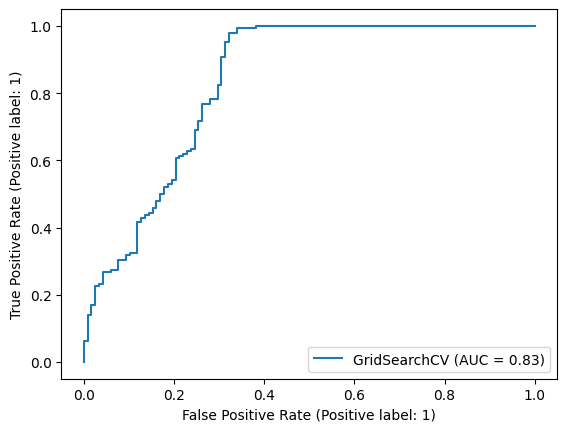

In [ ]:
RocCurveDisplay.from_estimator(estimator=gs_nb,
                               X=X_test,
                               y=y_test);

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 81  37]
 [  7 135]]


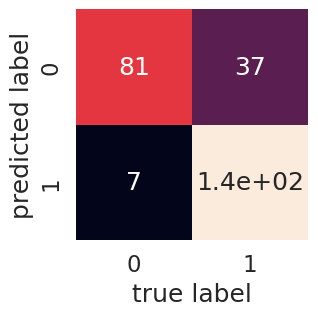

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [ ]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       118
           1       0.78      0.95      0.86       142

    accuracy                           0.83       260
   macro avg       0.85      0.82      0.82       260
weighted avg       0.85      0.83      0.83       260



What's going on here?

Let's get a refresh.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).
Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action

In [ ]:
# Check best hyperparameters
gs_nb.best_params_

{'var_smoothing': 1.0}

In [ ]:
# Assuming gs_nb.best_params_ has been defined as shown in previous examples
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
best_var_smoothing = gs_nb.best_params_['var_smoothing']
clf_nb = GaussianNB(var_smoothing=best_var_smoothing)

# Cross-validated accuracy score
cv_acc = cross_val_score(clf_nb,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_mean = np.mean(cv_acc)
print("Cross-validated Accuracy:", cv_acc_mean)

# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf_nb,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
print("Cross-validated Precision:", cv_precision)

# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf_nb,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
print("Cross-validated Recall:", cv_recall)

# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf_nb,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
print("Cross-validated F1 Score:", cv_f1)

Cross-validated Accuracy: 0.8061538461538461
Cross-validated Precision: 0.7735568180377193
Cross-validated Recall: 0.9290932811480757
Cross-validated F1 Score: 0.8439407675230391


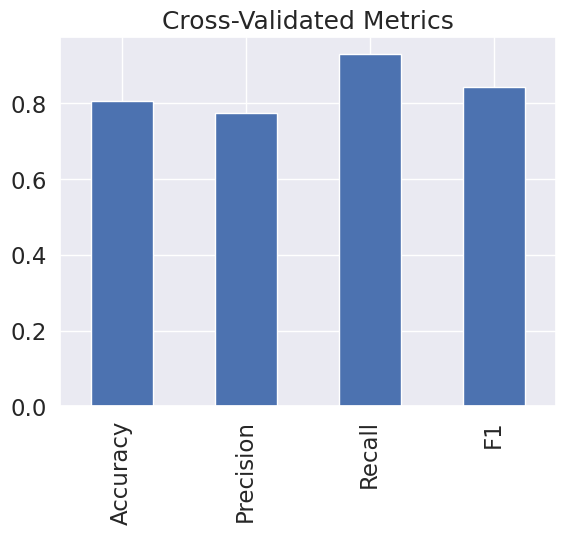

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc_mean,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature Importance

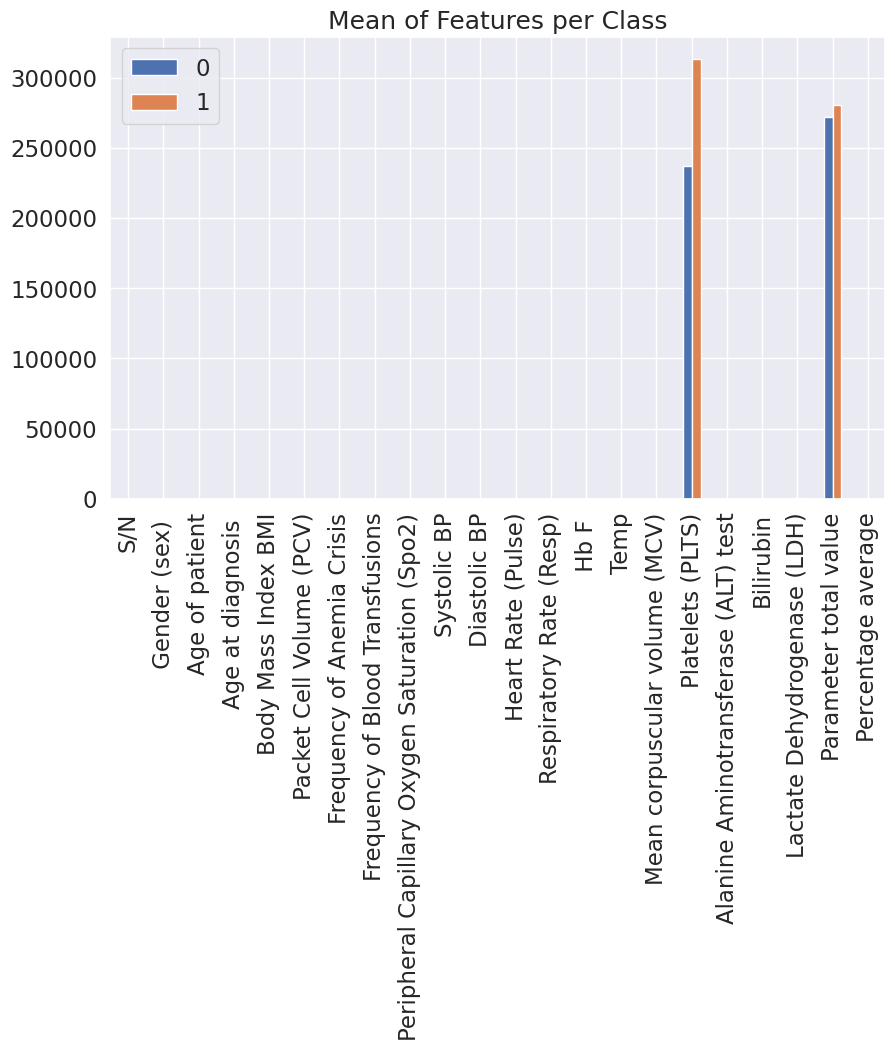

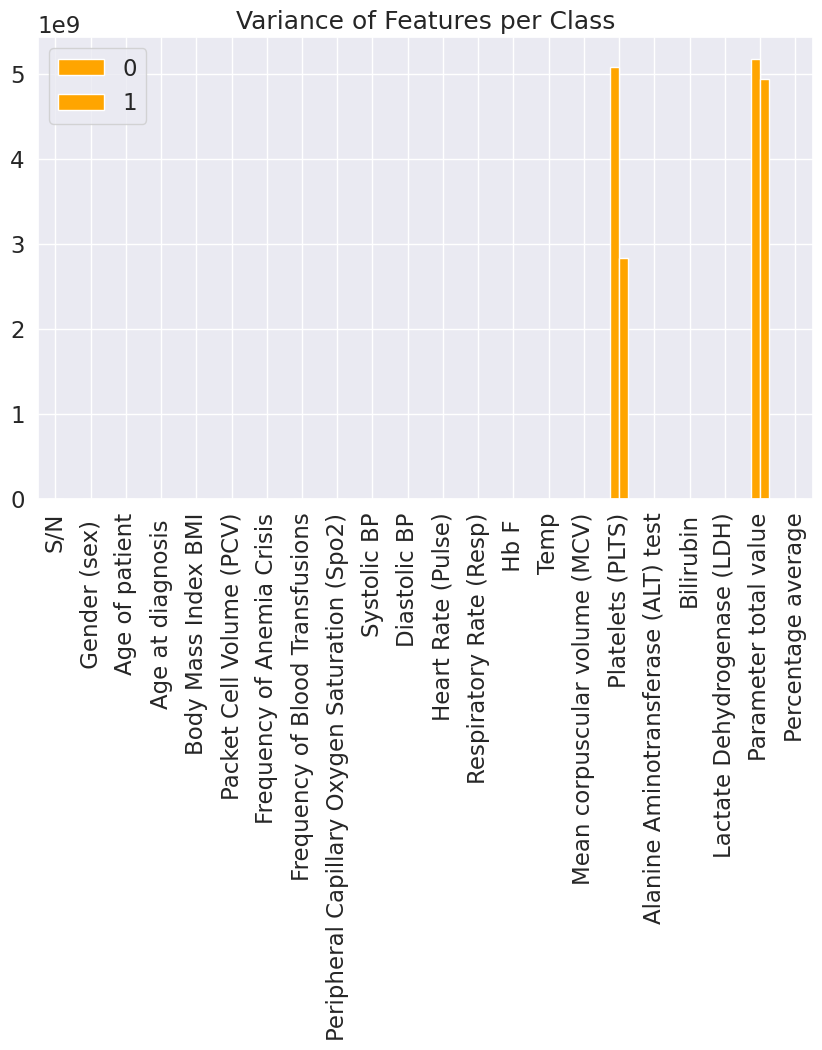

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and target variable respectively
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Gaussian Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Extract the mean of each feature per class
means = clf_nb.theta_  # shape (n_classes, n_features)

# Extract the variance of each feature per class
variances = clf_nb.var_  # shape (n_classes, n_features)

# Assuming 'X' is a DataFrame for simplicity in matching feature names
features = X.columns

# Create DataFrame for means and variances for visualization
means_df = pd.DataFrame(means, columns=features)
variances_df = pd.DataFrame(variances, columns=features)

# Plotting the means
means_df.T.plot.bar(title="Mean of Features per Class", figsize=(10, 6))
plt.show()

# Plotting the variances
variances_df.T.plot.bar(title="Variance of Features per Class", figsize=(10, 6), color='orange')
plt.show()


## From the above explanatory analysis, we have chose to continue with the RandomForest ensembler

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Put Random Forest model in a dictionary
models = {"Random Forest": RandomForestClassifier()}

# Create a function to fit and score the Random Forest model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the Random Forest model.
    models : a dict containing only the Random Forest model
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models (in this case, only one model)
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

# Call the function
fit_and_score(models, X_train, X_test, y_train, y_test)


{'Random Forest': 0.9384615384615385}

In [ ]:
from joblib import dump

# Assuming `model` is your trained Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
dump(model, '/content/drive/MyDrive/Colab Notebooks/random_forest_model.joblib')


['/content/drive/MyDrive/Colab Notebooks/random_forest_model.joblib']

## importing tfdf

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scd-extended.csv")
dataset.columns

Index(['S/N', ' Gender (sex) ', 'Age of patient', 'Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification'],
      dtype='object')

In [ ]:
print(dataset.dtypes)


S/N                                               int64
 Gender (sex)                                     int64
Age of patient                                    int64
Age at diagnosis                                  int64
Body Mass Index BMI                               int64
Packet Cell Volume (PCV)                          int64
Frequency of Anemia Crisis                        int64
Frequency of Blood Transfusions                   int64
Peripheral Capillary Oxygen Saturation (Spo2)     int64
Systolic BP                                       int64
Diastolic BP                                      int64
Heart Rate (Pulse)                                int64
Respiratory Rate (Resp)                           int64
 Hb F                                             int64
Temp                                              int64
Mean corpuscular volume (MCV)                     int64
Platelets (PLTS)                                  int64
Alanine Aminotransferase (ALT) test             

In [ ]:
print(dataset['Pain Classification'].head())


0    Vaso-occlusive Crisis\n
1                  Mild Pain
2    Vaso-occlusive Crisis\n
3    Vaso-occlusive Crisis\n
4    Vaso-occlusive Crisis\n
Name: Pain Classification, dtype: object


In [ ]:
# Define a mapping dictionary
label_map = {"Mild Pain": 0, "Vaso-occlusive Crisis\n": 1}

# Map the values in the "Pain Classification" column to integers
dataset['Pain Classification'] = dataset['Pain Classification'].map(label_map)

# Check the updated DataFrame
print(dataset['Pain Classification'].head())  # Print first few rows to verify


0    1
1    0
2    1
3    1
4    1
Name: Pain Classification, dtype: int64


In [ ]:
dataset['Pain Classification'] = dataset['Pain Classification'].astype(int)


In [ ]:
print(dataset.dtypes)

S/N                                              int64
 Gender (sex)                                    int64
Age of patient                                   int64
Age at diagnosis                                 int64
Body Mass Index BMI                              int64
Packet Cell Volume (PCV)                         int64
Frequency of Anemia Crisis                       int64
Frequency of Blood Transfusions                  int64
Peripheral Capillary Oxygen Saturation (Spo2)    int64
Systolic BP                                      int64
Diastolic BP                                     int64
Heart Rate (Pulse)                               int64
Respiratory Rate (Resp)                          int64
 Hb F                                            int64
Temp                                             int64
Mean corpuscular volume (MCV)                    int64
Platelets (PLTS)                                 int64
Alanine Aminotransferase (ALT) test              int64
Bilirubin 

In [ ]:
# Rename the column
dataset = dataset.rename(columns={"Pain Classification": "PainClassification"})

# Check the updated DataFrame
print(dataset.head())

# Assuming dataset is your DataFrame
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv', index=False)


   S/N   Gender (sex)   Age of patient  Age at diagnosis   \
0    1               0               4                  3   
1    2               1               3                 12   
2    3               1              40                  3   
3    4               0              10                 12   
4    5               1               6                  8   

   Body Mass Index BMI  Packet Cell Volume (PCV)  Frequency of Anemia Crisis  \
0                   20                        88                           2   
1                   47                        11                          10   
2                   18                        71                           6   
3                   37                        72                           2   
4                   39                        17                           5   

   Frequency of Blood Transfusions  \
0                                3   
1                                3   
2                                1   


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv")
dataset.columns

Index(['S/N', ' Gender (sex) ', 'Age of patient', 'Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'PainClassification'],
      dtype='object')

In [ ]:
!pip install tensorflow-decision-forests

In [ ]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv")

# Preprocessing: Drop unnecessary columns and handle missing values
# dataset = dataset.drop(columns=['S/N'])  # Assuming 'S/N' is not needed for training
# dataset.dropna(inplace=True)  # Drop rows with missing values

# Split dataset into features and labels
X = dataset.drop(columns=['PainClassification'])
y = dataset['PainClassification']

# Add the label column back to the features
X['PainClassification'] = y

# Convert labels to numerical values if needed
# For example, if 'PainClassification' contains categorical labels like 'mild', 'moderate', 'severe'
# You may want to convert them to numerical values
# You can use LabelEncoder from sklearn.preprocessing for this purpose

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the training set to a TensorFlow Dataset
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label="PainClassification")

# Define and train the model
tfdf_model = tfdf.keras.RandomForestModel()
tfdf_model.fit(tf_train_dataset)

# Convert the model to TensorFlow Lite format

converter.target_spec.supported_ops = [
       tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
       tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
   ]

converter = tf.lite.TFLiteConverter.from_keras_model(tfdf_model)

tflite_model = converter.convert()


# Save the TensorFlow Lite model to a file
with open("/content/drive/MyDrive/Colab Notebooks/rforest/random_forest_model.tflite", "wb") as f:
    f.write(tflite_model)

# Save the corresponding labels to a file
labels = dataset["PainClassification"].unique().tolist()
with open("/content/drive/MyDrive/Colab Notebooks/rforest/labels.txt", "w") as f:
    f.write("\n".join(labels))


Use /tmp/tmpik1hr4kd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.391805. Found 910 examples.
Training model...
Model trained in 0:00:00.406544
Compiling model...
Model compiled.


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


ConverterError: Could not translate MLIR to FlatBuffer./usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py:379:1: error: 'tf.Placeholder' op is neither a custom op nor a flex op
  args = [ops.convert_to_tensor(x) for x in args]
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/profiler/trace.py:183:1: note: called from
      return func(*args, **kwargs)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py:713:1: note: called from
  return tensor_conversion_registry.convert(
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/tensor_conversion_registry.py:209:1: note: called from
    return overload(dtype, name)  #  pylint: disable=not-callable
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py:607:1: note: called from
      return graph.capture(self, name=name)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/func_graph.py:675:1: note: called from
    return self._function_captures.capture_by_value(self, tensor, name)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/capture/capture_container.py:141:1: note: called from
      return self._create_placeholder_helper(graph, tensor, name)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/capture/capture_container.py:285:1: note: called from
      placeholder = spec.placeholder_value(placeholder_ctx)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/tensor.py:1019:1: note: called from
        placeholder = self._graph_placeholder(context_graph, name=name)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/tensor.py:1059:1: note: called from
      op = graph._create_op_internal(  # pylint: disable=protected-access
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py:379:1: note: Error code: ERROR_NEEDS_FLEX_OPS
  args = [ops.convert_to_tensor(x) for x in args]
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/operators/control_flow.py:466:1: error: 'tf.SimpleMLInferenceOpWithHandle' op is neither a custom op nor a flex op
      original_body(protected_iter)
^
/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py:702:1: note: called from
    for item_idx, multitask_item in enumerate(self._multitask):
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/operators/control_flow.py:1217:1: note: called from
    _py_if_stmt(cond, body, orelse)
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/operators/control_flow.py:1270:1: note: called from
  return body() if cond else orelse()
^
/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py:705:1: note: called from
      sub_pred = self._models[item_idx].apply(normalized_inputs)
^
/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/tensorflow/ops/inference/api.py:378:1: note: called from
     dense_col_representation) = op.SimpleMLInferenceOpWithHandle(
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/tf_export.py:377:1: note: called from
    return f(**kwargs)
^
<string>:527:1: note: called from
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/op_def_library.py:796:1: note: called from
      op = g._create_op_internal(op_type_name, inputs, dtypes=None,
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/func_graph.py:670:1: note: called from
    return super()._create_op_internal(  # pylint: disable=protected-access
^
/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/operators/control_flow.py:466:1: note: Error code: ERROR_NEEDS_CUSTOM_OPS
      original_body(protected_iter)
^
<unknown>:0: error: failed while converting: 'main': 
Some ops are not supported by the native TFLite runtime, you can enable TF kernels fallback using TF Select. See instructions: https://www.tensorflow.org/lite/guide/ops_select 
TF Select ops: Placeholder
Details:
	tf.Placeholder() -> (tensor<!tf_type.resource>) : {_user_specified_name = "19926", device = "", shape = #tf_type.shape<>}

Some ops in the model are custom ops, See instructions to implement custom ops: https://www.tensorflow.org/lite/guide/ops_custom 
Custom ops: SimpleMLInferenceOpWithHandle
Details:
	tf.SimpleMLInferenceOpWithHandle(tensor<?x22xf32>, tensor<0x0xf32>, tensor<0x0xi32>, tensor<0xi32>, tensor<1xi64>, tensor<1xi64>, tensor<!tf_type.resource>) -> (tensor<?x2xf32>, tensor<2x!tf_type.string>) : {_class = ["loc:@Func/random_forest_model_21/StatefulPartitionedCall/PartitionedCall_1/input/_69"], dense_output_dim = 2 : i64, device = ""}



In [ ]:
print(X_train.columns)

Index(['S/N', ' Gender (sex) ', 'Age of patient', 'Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average'],
      dtype='object')


In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

# Assuming "dataset" is already defined and loaded
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv")

# Convert the dataset to a TensorFlow Dataset
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="PainClassification")

# Define and train the model
tfdf_model = tfdf.keras.RandomForestModel()
tfdf_model.fit(tf_dataset)


Use /tmp/tmpp55hvjot as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.549511. Found 1300 examples.
Training model...
Model trained in 0:00:00.496345
Compiling model...
Model compiled.


In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv")

# Rename the columns to use valid node names
# Example: Replace invalid characters such as spaces and parentheses with underscores
dataset.columns = dataset.columns.str.replace(" ", "_").str.replace("(", "_").str.replace(")", "_")

# Convert the dataset to a TensorFlow Dataset with explicit column names
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="PainClassification")

# Define and train the model
tfdf_model = tfdf.keras.RandomForestModel()
tfdf_model.fit(tf_dataset)


Use /tmp/tmpg1bujx6m as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.400867. Found 1300 examples.
Training model...
Model trained in 0:00:00.519004
Compiling model...
Model compiled.


In [ ]:
# Save the model
tfdf_model.save("/content/drive/MyDrive/Colab Notebooks/tfdf_model")

# Optionally, you can also save the model's weights separately
tfdf_model.save_weights("/content/drive/MyDrive/Colab Notebooks/tfdf_model")

In [ ]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.saved_model.load("/content/drive/MyDrive/Colab Notebooks/tfdf_model")

# Now you can use the loaded model for inference or further training


In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/Colab Notebooks/tfdf_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/Colab Notebooks/tfdf_model/model.tflite', 'wb') as f:
  f.write(tflite_model)

ConverterError: Could not translate MLIR to FlatBuffer.<unknown>:0: error: loc(fused["SimpleMLCreateModelResource:", "SimpleMLCreateModelResource"]): 'tf.SimpleMLCreateModelResource' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["SimpleMLCreateModelResource:", "SimpleMLCreateModelResource"]): Error code: ERROR_NEEDS_CUSTOM_OPS
<unknown>:0: error: loc(callsite(callsite(callsite(fused["SimpleMLInferenceOpWithHandle:", "inference_op@__inference_call_21460"] at fused["StatefulPartitionedCall:", "random_forest_model_23/StatefulPartitionedCall@__inference__wrapped_model_21465"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_21805"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall"])): 'tf.SimpleMLInferenceOpWithHandle' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: note: loc(callsite(callsite(callsite(fused["SimpleMLInferenceOpWithHandle:", "inference_op@__inference_call_21460"] at fused["StatefulPartitionedCall:", "random_forest_model_23/StatefulPartitionedCall@__inference__wrapped_model_21465"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_21805"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall"])): Error code: ERROR_NEEDS_CUSTOM_OPS
<unknown>:0: error: failed while converting: 'main': 
Some ops in the model are custom ops, See instructions to implement custom ops: https://www.tensorflow.org/lite/guide/ops_custom 
Custom ops: SimpleMLCreateModelResource, SimpleMLInferenceOpWithHandle
Details:
	tf.SimpleMLCreateModelResource() -> (tensor<!tf_type.resource>) : {container = "", device = "", shared_name = "simple_ml_model_38ab5279-3e28-4d2f-8abd-c7d3aa7340e7"}
	tf.SimpleMLInferenceOpWithHandle(tensor<?x22xf32>, tensor<0x0xf32>, tensor<0x0xi32>, tensor<0xi32>, tensor<1xi64>, tensor<1xi64>, tensor<!tf_type.resource>) -> (tensor<?x2xf32>, tensor<2x!tf_type.string>) : {dense_output_dim = 2 : i64, device = ""}



In [ ]:
!tflite_convert \
  --saved_model_dir=/content/drive/MyDrive/Colab Notebooks/tfdf_model \
  --output_file=/content/drive/MyDrive/Colab Notebooks/rforrest/tfdf_model.tflite

2024-04-15 00:47:53.448004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tflite_convert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/tflite_convert.py", line 692, in main
    app.run(main=run_main, argv=sys.argv[:1])
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/tflite_convert.py", line 675, in run_main
    _convert_tf2_model(tflite_flags)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/tflite_convert.py", line 276, in _convert_tf2_model
    converter = lite.TFLiteConverterV2.from_saved_model(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/l

In [ ]:
import sklearn
from sklearn.base import clone

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tensorflow_decision_forests.keras import RandomForestModel
from sklearn.utils.fixes import loguniform

# Define the parameter grid
param_dist = {
    "num_trees": [100, 200, 300],
    "use_hessian_gain": [True, False],
    "split_axis": ['auto', 'top', 'global', 'local']
    # Add more hyperparameters to tune
}

# Define the TensorFlow Decision Forests estimator wrapper
def create_model(num_trees=100, use_hessian_gain=True, split_axis='auto'):
    return RandomForestModel(num_trees=num_trees, use_hessian_gain=use_hessian_gain, split_axis=split_axis)

# Wrap the TensorFlow Decision Forests model into an sklearn-compatible estimator
estimator = clone(create_model)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy of the best model:", accuracy)


TypeError: Cannot clone object '<function create_model at 0x7cff298ca680>' (type <class 'function'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
## Hyperparameter tuning for the model

import tensorflow_decision_forests as tfdf
import pandas as pd

# Load your dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/updated_dataset.csv")

# Convert the dataset to a TensorFlow Dataset
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="PainClassification")

# Define the tuner
tuner = tfdf.tuner.RandomSearch(
    num_trials=20  # Number of trials (random configurations) to try
)

# Define the hyperparameter space to search over
tuner.num_trees(min=10, max=1000, step=10)
tuner.max_depth(min=3, max=10)
# Add more hyperparameters to tune as needed

# Define and train the model with hyperparameter tuning
model = tfdf.keras.RandomForestModel(tuner=tuner, objective="accuracy")
model.fit(tf_dataset)

# Print the best hyperparameters found during tuning
print("Best hyperparameters:", tuner.get_best_trials(num_trials=1))

# Print a summary of the trained model
print(model.summary())



AttributeError: 'RandomSearch' object has no attribute 'num_trees'

In [ ]:
from joblib import dump, load
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

# Load the saved Random Forest model
random_forest_model = load('/content/drive/MyDrive/Colab Notebooks/random_forest_model.joblib')

# Define a function to convert scikit-learn Random Forest model to TensorFlow
def convert_to_tensorflow_model(sklearn_model):
    # Define the TensorFlow model architecture and convert the parameters
    # from the scikit-learn model to TensorFlow format
    # Implement decision trees and combine predictions

    # Example code to create a simple TensorFlow model (replace with your implementation)
    tensorflow_model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the TensorFlow model
    tensorflow_model.compile(optimizer='adam',
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    return tensorflow_model

# Convert the scikit-learn Random Forest model to TensorFlow
tensorflow_model = convert_to_tensorflow_model(random_forest_model)

# Train the TensorFlow model
tensorflow_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the trained TensorFlow model
tensorflow_model.save('/content/drive/MyDrive/Colab Notebooks/scd_tensorflow_model.h5')

Epoch 1/10
33/33 [==============================] - 2s 14ms/step - loss: 158665.6094 - accuracy: 0.4317 - val_loss: 129274.5859 - val_accuracy: 0.4538
Epoch 2/10
33/33 [==============================] - 0s 5ms/step - loss: 110595.6484 - accuracy: 0.4317 - val_loss: 82628.2812 - val_accuracy: 0.4538
Epoch 3/10
33/33 [==============================] - 0s 4ms/step - loss: 61799.0078 - accuracy: 0.4317 - val_loss: 34667.2930 - val_accuracy: 0.4538
Epoch 4/10
33/33 [==============================] - 0s 4ms/step - loss: 15789.3506 - accuracy: 0.5115 - val_loss: 4301.9702 - val_accuracy: 0.6962
Epoch 5/10
33/33 [==============================] - 0s 5ms/step - loss: 4792.4526 - accuracy: 0.6779 - val_loss: 4087.6895 - val_accuracy: 0.7000
Epoch 6/10
33/33 [==============================] - 0s 4ms/step - loss: 4244.3774 - accuracy: 0.6548 - val_loss: 3866.2107 - val_accuracy: 0.6923
Epoch 7/10
33/33 [==============================] - 0s 5ms/step - loss: 3934.1172 - accuracy: 0.6644 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (1040, 22)
Shape of X_test: (260, 22)


In [ ]:
!pip install --upgrade tensorflow-decision-forests



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found exis

In [ ]:
data.columns

Index(['S/N', ' Gender (sex) ', 'Age of patient', 'Age at diagnosis ',
       'Body Mass Index BMI', 'Packet Cell Volume (PCV)',
       'Frequency of Anemia Crisis', 'Frequency of Blood Transfusions',
       'Peripheral Capillary Oxygen Saturation (Spo2)', 'Systolic BP',
       'Diastolic BP', 'Heart Rate (Pulse)', 'Respiratory Rate (Resp)',
       ' Hb F ', 'Temp', 'Mean corpuscular volume (MCV)', 'Platelets (PLTS)',
       'Alanine Aminotransferase (ALT) test', 'Bilirubin',
       'Lactate Dehydrogenase (LDH)', 'Parameter total value',
       'Percentage average', 'Pain Classification'],
      dtype='object')

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pandas

In [ ]:
pip install wurlitzer

In [ ]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

In [ ]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.9.0


In [ ]:
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scd-extended.csv")

# Display the first 3 examples.
dataset_df.head(3)

,S/N,Gender (sex),Age of patient,Age at diagnosis,Body Mass Index BMI,Packet Cell Volume (PCV),Frequency of Anemia Crisis,Frequency of Blood Transfusions,Peripheral Capillary Oxygen Saturation (Spo2),Systolic BP,...,Hb F,Temp,Mean corpuscular volume (MCV),Platelets (PLTS),Alanine Aminotransferase (ALT) test,Bilirubin,Lactate Dehydrogenase (LDH),Parameter total value,Percentage average,Pain Classification
0,1,0,4,3,20,88,2,3,2,114,...,13,40,139,387376,42,0,265,388388,97,Vaso-occlusive Crisis\n
1,2,1,3,12,47,11,10,3,35,130,...,16,40,134,209786,15,1,303,210760,53,Mild Pain
2,3,1,40,3,18,71,6,1,23,168,...,12,38,135,239317,51,1,335,240473,60,Vaso-occlusive Crisis\n


In [ ]:

# Name of the label column.
label = "Pain Classification"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: ['Vaso-occlusive Crisis\n', 'Mild Pain']


In [ ]:

import pandas as pd

# Name of the label column.
label = "Pain Classification"

# Check if the label column exists in the dataframe.
if label not in dataset_df.columns:
    raise KeyError(f"Label column '{label}' not found in the dataframe.")

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

# Convert label values to numerical indices.
dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: [0, 1]


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.40):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

779 examples in training, 521 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

KeyError: "['Pain Classification'] not found in axis"

In [ ]:


# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp8vyvvsf3 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'S/N': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Gender_(sex)_': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Age_of_patient': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'Age_at_diagnosis_': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Body_Mass_Index_BMI': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'Packet_Cell_Volume_(PCV)': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'Frequency_of_Anemia_Crisis': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'Frequency_of_Blood_Transfusions': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'Peripheral_Capillary_Oxygen_Saturation_(Spo2)': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'Systolic_BP': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'Diastolic_BP': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'Heart_Rate_(Pulse)': <tf.Tensor 'data_11:0' 

[INFO 24-04-09 23:38:16.0751 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-04-09 23:38:16.0752 UTC kernel.cc:772] Collect training examples
[INFO 24-04-09 23:38:16.0752 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-04-09 23:38:16.0757 UTC kernel.cc:391] Number of batches: 1
[INFO 24-04-09 23:38:16.0757 UTC kernel.cc:392] Number of examples: 792
[INFO 24-04-09 23:38:16.0761 UTC kernel.cc:792] Training dataset:
Number of records: 792
Number of columns: 23

Number of columns by type:
	NUMERICAL: 22 (95.6522%)
	CATEGORICAL: 1 (4.34783%)

Columns:

NUMERICAL: 22 (95.6522%)
	0: "Age_at_diagnosis_" NUMERICAL mean:7.76136 min:1 max:1

Model trained in 0:00:00.904637
Compiling model...
Model compiled.


In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/Colab Notebooks/random_forest_model.joblib")
tflite_model = converter.convert()

# Save the model.
with open('fruits_model.tflite', 'wb') as f:
  f.write(tflite_model)

OSError: SavedModel file does not exist at: /content/drive/MyDrive/Colab Notebooks/random_forest_model.joblib/{saved_model.pbtxt|saved_model.pb}